In [139]:
import pandas as pd 
import seaborn as sns
import numpy as np
import requests
import matplotlib.pyplot as plt

In [77]:
df = pd.read_json('gme.json')
df2 = pd.read_json('recentGME.json')
amc = pd.read_csv('AMC.csv')
wsb = pd.read_json('light_encode_wsb.json')

In [3]:
#WRVYEKR822BPE8OX

url = 'https://api.polygon.io/v1/open-close/GME/2024-05-14?adjusted=true&apiKey=HhkUAUN3cv5eXiqIZXhWZ4l3JZCsvlBF'
r = requests.get(url)
data = r.json()

print(data)

{'status': 'OK', 'from': '2024-05-14', 'symbol': 'GME', 'open': 64.83, 'high': 64.83, 'low': 36, 'close': 48.75, 'volume': 206973629.0, 'afterHours': 51, 'preMarket': 40.31}


In [26]:
def gather_data(start, end):
    startMonth = pd.to_datetime(start).day
    endMonth = pd.to_datetime(end).day
    data = {'Date': [],"Open": [],'High': [],'Low': [],'Close': [],'Volume': []}
    current = start
    for month in range(startMonth, endMonth + 1):
        for day in range(1, 26):
            url = 'https://api.polygon.io/v1/open-close/GME/' + current + '?adjusted=true&apiKey=HhkUAUN3cv5eXiqIZXhWZ4l3JZCsvlBF'
            r = requests.get(url)
            jsonData = r.json()
            data['Open'].append(jsonData['open'])
            data['High'].append(jsonData['high'])
            data['Low'].append(jsonData['low'])
            data['Close'].append(jsonData['close'])
            data['Volume'].append(jsonData['volume'])
            if day < 10:
                date = pd.to_datetime('2024' + str(month) + str(day))
                data['Date'].append(date)
                current = '2024-' + '0' + str(month) + '0' + str(day)
            else:
                date = pd.to_datetime('2024' + str(month) + str(day))
                data['Date'].append(date)
                current = '2024-' + '0' + str(month) + str(day)
                
    return pd.DataFrame(data)

In [28]:
##gather_data('2024-05-14', '2024-09-26')

In [ ]:
df.info()

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df['High'].max()

120.75

In [8]:
df[df['High']==120.75]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [9]:
count = 0
total = 0
for i in range(len(df)):
    if df.loc[i]['Date'].month == 6:
        avg = (df.loc[i]['High']+ df.loc[i]['Low'])/2
        total += avg
        count += 1
total/count

10.193287575692963

<AxesSubplot:xlabel='Volume', ylabel='Low'>

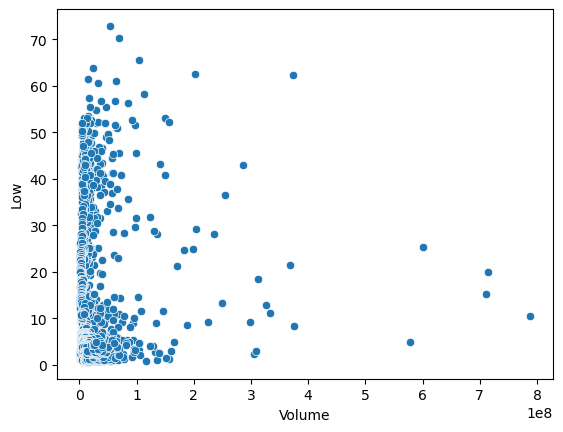

In [10]:
sns.scatterplot(data = df, x='Volume', y = 'Low')

In [11]:
df["Low"].corr(df['Volume'])

0.10259646883179026

In this data the direction is negative. This is a very very weak negative relationship between these varibles. I calculated the Pearsono correlation coefficient and it is 0.1 proving that this was a weak relationship. 

<AxesSubplot:xlabel='Date', ylabel='High'>

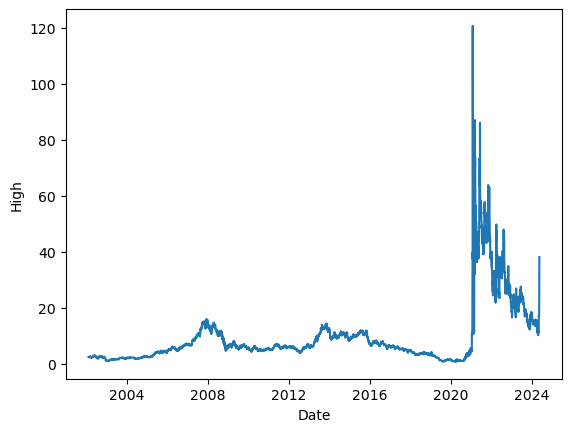

In [12]:
sns.lineplot(data = df, x='Date', y = 'High')

In [13]:
##log_high = np.log(df['High'])

In [14]:
##df['Log High'] = log_high

In [15]:
##df['numeric_time'] = pd.to_datetime(df['Date']).astype('int64') // 10**9

##correlation = df['numeric_time'].corr(df['Log High'])

In [16]:
##correlation

The form of this graph is exponetial.

In [17]:
df["Date"].max()

Timestamp('2024-05-13 00:00:00')

In [18]:
df["Date"].min()

Timestamp('2002-02-13 00:00:00')

In [19]:
count = 0
total = 0
for i in range(len(df)):
    if df.loc[i]['Date'].year < 2024:
        count += 1
count/22

250.36363636363637

In [20]:
df.drop(['Adj Close'],inplace = True, axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5600 non-null   datetime64[ns]
 1   Open    5600 non-null   float64       
 2   High    5600 non-null   float64       
 3   Low     5600 non-null   float64       
 4   Close   5600 non-null   float64       
 5   Volume  5600 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 262.6 KB


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    94 non-null     datetime64[ns]
 1   Open    94 non-null     float64       
 2   High    94 non-null     float64       
 3   Low     94 non-null     float64       
 4   Close   94 non-null     float64       
 5   Volume  94 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.5 KB


In [23]:
result = pd.concat([df, df2])

In [24]:
result.reset_index(inplace=True)

In [25]:
result.tail()

,index,Date,Open,High,Low,Close,Volume
5689,89,2024-09-20,19.63,22.03,19.4820,21.85,60804837
5690,90,2024-09-23,21.54,22.56,21.2301,22.31,13945783
5691,91,2024-09-24,22.61,22.72,21.5400,22.63,12112487
5692,92,2024-09-25,22.16,22.83,22.0650,22.18,6137420
5693,93,2024-09-26,22.40,22.64,21.8700,22.29,5771976


In [122]:
df.drop(['Adj Close'],inplace = True, axis=1)

In [60]:
amc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2081 non-null   datetime64[ns]
 1   Open    2081 non-null   float64       
 2   High    2081 non-null   float64       
 3   Low     2081 non-null   float64       
 4   Close   2081 non-null   float64       
 5   Volume  2081 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 97.7 KB


In [104]:
amc['Date']= pd.to_datetime(amc['Date'])

<AxesSubplot:title={'center':'Comparing GME and AMC stocks over time'}, xlabel='Date', ylabel='High'>

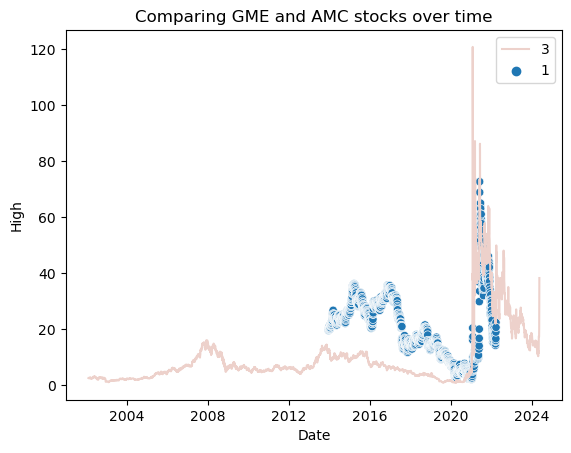

In [76]:
sns.lineplot(data = df, x='Date', y = 'High', hue=3).set_title('Comparing GME and AMC stocks over time')
sns.scatterplot(data = amc, x='Date', y = 'High', hue=1)

In [78]:
wsb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   label      500 non-null    object        
 1   timestamp  500 non-null    datetime64[ns]
 2   score      500 non-null    int64         
 3   comms_num  500 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 19.5+ KB


In [79]:
wsb.head()

,label,timestamp,score,comms_num
0,AMC,2021-01-28,38408,6027
1,AMC,2021-01-29,22404,7023
2,AMC,2021-01-30,66084,11660
3,AMC,2021-01-31,54180,6934
4,AMC,2021-02-01,122882,8710


In [100]:
amc_wsb = wsb[wsb['label']=='AMC']

In [118]:
gme_wsb = wsb[wsb['label']=='GME']

In [97]:
wsb.rename(columns = {'timestamp':"Date"}, inplace= True)

In [108]:
AMC_merged = pd.merge(amc, amc_wsb,how = 'inner', on ='Date' )

In [124]:
GME_merged = pd.merge(df, gme_wsb,how = 'inner', on ='Date' )

In [125]:
GME_merged.head()

,Date,Open,High,Low,Close,Volume,label,score,comms_num
0,2021-01-28,66.250000,120.750000,28.0625,48.400002,235263200,GME,268078,26332
1,2021-01-29,94.927498,103.495003,62.5000,81.250000,202264400,GME,1285976,277238
2,2021-02-01,79.139999,80.500000,53.0000,56.250000,149528800,GME,1125454,165514
3,2021-02-02,35.189999,39.500000,18.5550,22.500000,312732400,GME,489902,82138
4,2021-02-03,28.002501,28.350000,21.3125,23.102501,170794000,GME,768288,189625


In [110]:
AMC_merged.head()

,Date,Open,High,Low,Close,Volume,label,score,comms_num
0,2021-01-28,11.98,16.50,6.51,8.63,591223900,AMC,38408,6027
1,2021-01-29,14.31,16.00,11.60,13.26,602193300,AMC,22404,7023
2,2021-02-01,17.00,17.25,12.91,13.30,434608000,AMC,122882,8710
3,2021-02-02,9.48,10.10,6.00,7.82,462775900,AMC,16928,3338
4,2021-02-03,8.85,9.77,7.89,8.97,221405100,AMC,97207,7629


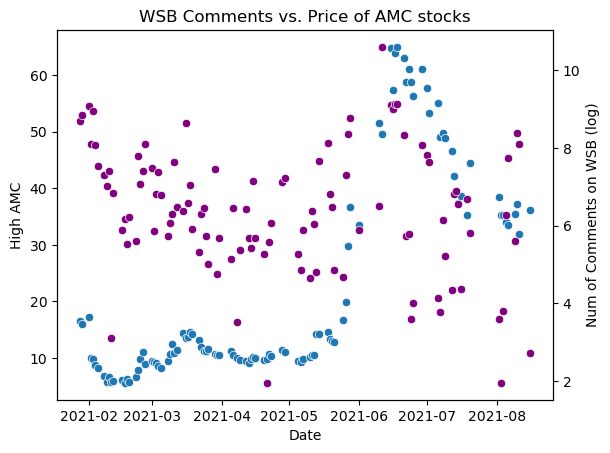

In [142]:
ax1 = sns.scatterplot(data = AMC_merged, x='Date', y = 'High')
ax2 = ax1.twinx()
sns.scatterplot(data = AMC_merged, x='Date', y = log_comms, color = 'purple')

ax1.set_ylabel('High AMC')
ax2.set_ylabel('Num of Comments on WSB (log)')
plt.title('WSB Comments vs. Price of AMC stocks')

plt.show()

In [129]:
log_comms = np.log(AMC_merged['comms_num'])
log_high = np.log(AMC_merged['High'])

<AxesSubplot:xlabel='Date', ylabel='High'>

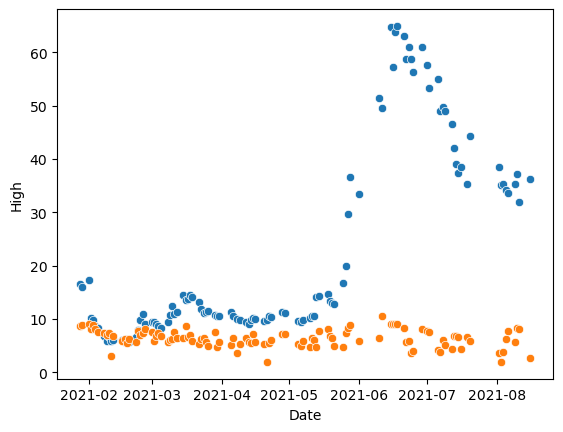

In [138]:
sns.scatterplot(data = AMC_merged, x='Date', y = 'High')
sns.scatterplot(data = AMC_merged, x='Date', y = log_comms)

### The orange is the comments and the blue is the price.

In [131]:
log_high2 = np.log(GME_merged['High'])
log_comms2 = np.log(GME_merged['comms_num'])